<a href="https://colab.research.google.com/github/davidviana/clusters/blob/main/Atividade_Swift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import math as Math
from tkinter import font
import seaborn as sns
import datetime

In [78]:
df = pd.read_csv('Swift_SALES.csv')
df_list = df[['id_cliente', 'id_pedido', 'item_id','preco','horario_pedido']]
df_list.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35
1,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,1,112.99,2020-11-09 00:50:13
2,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,2,112.99,2020-11-09 00:50:13
3,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26
4,6bc8d08963a135220ed6c6d098831f84,2e604b3614664aa66867856dba7e61b7,1,106.99,2021-02-03 19:45:40


In [79]:
# Recency
df_compra = df[['id_cliente', 'horario_pedido']]
df_compra = df.groupby('id_cliente') ['horario_pedido'].max()
df_compra = df_compra.reset_index()
df_compra.columns = ['id_cliente', 'data_max']

In [80]:
df_compra['data_max'] = pd.to_datetime(df_compra['data_max'])
df_compra['recency'] = (datetime.datetime.today() - df_compra['data_max']).dt.days
df_compra.head()

,id_cliente,data_max,recency
0,00012a2ce6f8dcda20d059ce98491703,2020-11-14 16:08:26,716
1,000161a058600d5901f007fab4c27140,2020-07-16 09:40:32,837
2,0001fd6190edaaf884bcaf3d49edf079,2020-02-28 11:06:43,976
3,0002414f95344307404f0ace7a26f1d5,2020-08-16 13:09:20,806
4,000379cdec625522490c315e70c7a9fb,2021-04-02 13:42:17,577


In [81]:
df_cliente = pd.merge(df_list, df_compra[['id_cliente', 'recency']], on = 'id_cliente')
df_cliente.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido,recency
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35,898
1,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,1,112.99,2020-11-09 00:50:13,722
2,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,2,112.99,2020-11-09 00:50:13,722
3,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26,907
4,6bc8d08963a135220ed6c6d098831f84,2e604b3614664aa66867856dba7e61b7,1,106.99,2021-02-03 19:45:40,635


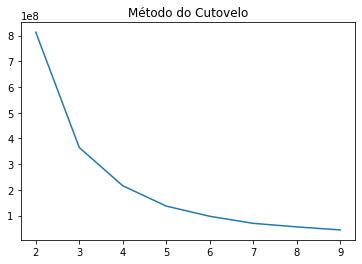

In [82]:
# metodo do cotovelo
x = df_cliente[['recency']]

wcss = []
for n in range(2, 10):
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=len(x), random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 10), wcss)
plt.title('Método do Cutovelo')
plt.show()

In [83]:
# distance

def optimal_clusters(wcss, cluster_final):
  x1, y1 = 2, wcss[0]
  x2, y2 = cluster_final, wcss[-1]

  distances = []
  for i in range(len(wcss)):
      x0 = i + 2
      y0 = wcss[i]
      numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
      denominator = Math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
      res = (numerator/denominator)
      distances.append(res)
    
  optimal_cluster = distances.index(max(distances)) + 2
  return optimal_cluster

In [84]:
optimal_clusters(wcss, 9)

4

In [85]:
# Frequency
df_pedido = df[['id_cliente', 'item_id']]
df_pedido = df.groupby('id_cliente') ['item_id'].count()
df_pedido = df_pedido.reset_index()
df_pedido.columns = ['id_cliente', 'frequency']

df_pedido.tail()

,id_cliente,frequency
97250,fffcb937e9dd47a13f05ecb8290f4d3e,1
97251,fffecc9f79fd8c764f843e9951b11341,3
97252,fffeda5b6d849fbd39689bb92087f431,1
97253,ffff42319e9b2d713724ae527742af25,1
97254,ffffa3172527f765de70084a7e53aae8,2


In [86]:
# Monetary

df_receita = df[['id_cliente', 'id_pedido', 'preco']]
df_receita = df.groupby('id_cliente') ['preco'].sum()
df_receita = df_receita.reset_index()
df_receita.columns = ['id_cliente', 'monetary']
df_receita.tail()

,id_cliente,monetary
97250,fffcb937e9dd47a13f05ecb8290f4d3e,78.0
97251,fffecc9f79fd8c764f843e9951b11341,164.7
97252,fffeda5b6d849fbd39689bb92087f431,47.9
97253,ffff42319e9b2d713724ae527742af25,199.9
97254,ffffa3172527f765de70084a7e53aae8,21.8


In [92]:
rfm = pd.merge(df_pedido[['id_cliente', 'frequency']], df_receita[['id_cliente', 'monetary']], on = 'id_cliente')
rfm = pd.merge(rfm, df_cliente[['id_cliente', 'recency']], on='id_cliente')
rfm.tail()

,id_cliente,frequency,monetary,recency
116576,fffecc9f79fd8c764f843e9951b11341,3,164.7,581
116577,fffeda5b6d849fbd39689bb92087f431,1,47.9,527
116578,ffff42319e9b2d713724ae527742af25,1,199.9,505
116579,ffffa3172527f765de70084a7e53aae8,2,21.8,789
116580,ffffa3172527f765de70084a7e53aae8,2,21.8,789


In [95]:
# Standardization

scaler = StandardScaler()
rfm_normal = rfm[['recency', 'frequency', 'monetary']]
rfm_normal['cluster'] = kmeans.labels_
rfm_normal.head()

,recency,frequency,monetary,cluster
0,716,1,89.80,1
1,837,1,54.90,2
2,976,1,179.99,2
3,806,1,149.90,1
4,577,1,93.00,6


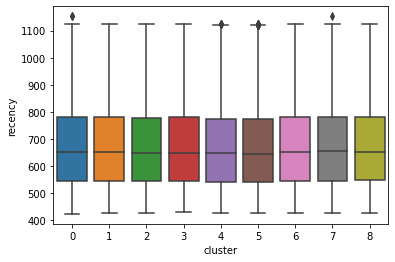

In [99]:
sns.boxplot(x='cluster', y='recency', data=rfm_normal)

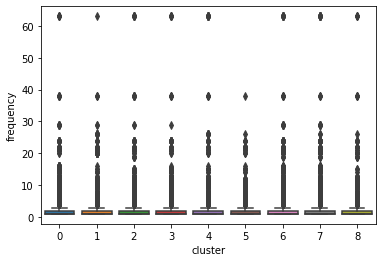

In [90]:
sns.boxplot(x='cluster', y='frequency', data=rfm_normal)

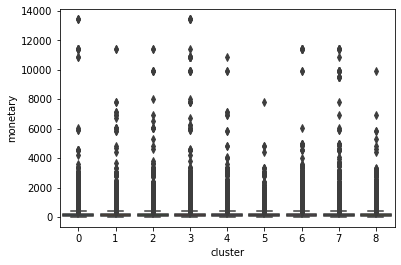

In [91]:
sns.boxplot(x='cluster', y='monetary', data=rfm_normal)